In [57]:
import scipy as sc
import numpy as np
from sklearn import * 

In [58]:
shape = 8
np.random.seed(23)

In [59]:
A = datasets.make_spd_matrix(shape,random_state=42)
b = np.random.rand(shape)
c = np.random.rand()

In [60]:
c

0.6180523472528092

In [61]:
v_analytical = np.linalg.pinv(A) @ b 

In [62]:
v_analytical 

array([ 2.74832887,  2.15538906,  5.16729555, -0.89473913,  1.54882475,
        2.08829555, -0.14042768,  1.2914188 ])

In [63]:
def calc_objective(v, A, b, c):
    return v.T @ A @ v  - 2*b.T@v  + c 

In [64]:
optimal_obj = calc_objective(v_analytical, A, b, c)

In [65]:
def calc_gradient(v, A, b):
    return 2*A@v - 2*b

In [66]:
#to find the minima, I will run GD, parameter = w
v_gd = np.ones(shape,)* 0.1
gd_history = []
step_size = 1/(2*np.linalg.norm(A, ord= 2) + np.linalg.norm(b) )
print("step size = ", step_size)
max_iter = 1000
for iter in range(max_iter):
    v_gd = v_gd - step_size*calc_gradient(v_gd, A, b)
    cost = calc_objective(v_gd, A, b, c)
    gd_history.append(cost)
    if(iter % 100 == 0):
        print("Cost = %.5f, iteration = %d"%(cost, iter))


step size =  0.0538570831854576
Cost = -0.51577, iteration = 0
Cost = -8.60603, iteration = 100
Cost = -8.79431, iteration = 200
Cost = -8.80500, iteration = 300
Cost = -8.80601, iteration = 400
Cost = -8.80613, iteration = 500
Cost = -8.80614, iteration = 600
Cost = -8.80614, iteration = 700
Cost = -8.80614, iteration = 800
Cost = -8.80614, iteration = 900


In [67]:
Error_gradient_descent = np.linalg.norm (v_gd - v_analytical)
print(Error_gradient_descent)

6.924248478973983e-05


In [68]:
v_sgd = np.ones(shape, )* 0.1
sgd_history = []
max_iter = 100000
factor = 100
new_step_size = step_size/factor
epsilon = np.random.randn(shape,)
for iter in range (max_iter):
    v_sgd = v_sgd - new_step_size*(0.1*epsilon + calc_gradient(v_sgd, A, b) )     
    cost = calc_objective(v_sgd, A, b, c)
    sgd_history.append(cost)
    if(iter % 100 == 0):
        print("Cost = %.5f, iteration = %d"%(cost, iter))

Cost = -0.07236, iteration = 0
Cost = -0.51816, iteration = 100
Cost = -0.92795, iteration = 200
Cost = -1.31003, iteration = 300
Cost = -1.66774, iteration = 400
Cost = -2.00332, iteration = 500
Cost = -2.31864, iteration = 600
Cost = -2.61532, iteration = 700
Cost = -2.89480, iteration = 800
Cost = -3.15840, iteration = 900
Cost = -3.40730, iteration = 1000
Cost = -3.64256, iteration = 1100
Cost = -3.86515, iteration = 1200
Cost = -4.07597, iteration = 1300
Cost = -4.27580, iteration = 1400
Cost = -4.46540, iteration = 1500
Cost = -4.64542, iteration = 1600
Cost = -4.81648, iteration = 1700
Cost = -4.97916, iteration = 1800
Cost = -5.13396, iteration = 1900
Cost = -5.28136, iteration = 2000
Cost = -5.42180, iteration = 2100
Cost = -5.55569, iteration = 2200
Cost = -5.68341, iteration = 2300
Cost = -5.80530, iteration = 2400
Cost = -5.92169, iteration = 2500
Cost = -6.03287, iteration = 2600
Cost = -6.13913, iteration = 2700
Cost = -6.24073, iteration = 2800
Cost = -6.33790, iteration

In [69]:
Error_sgd = np.linalg.norm(v_sgd - v_analytical)
print(Error_sgd)

0.540538654342525


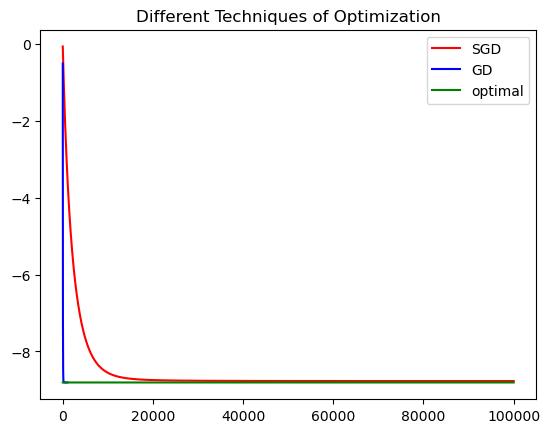

In [70]:
#now to complete
import matplotlib.pyplot as plt
plt.title('Different Techniques of Optimization')
plt.plot(sgd_history, 'r', label = 'SGD')
plt.plot(gd_history, 'b', label = 'GD')
plt.plot(optimal_obj*np.ones(100000), 'g', label= 'optimal')
plt.legend()
plt.show()